# Laboratorio 5 Page Rank

En este laboratorio utilizaremos la librería Networkx para ejemplificar las medidas de centralidad Page Rank.

Contenidos:

1.   Page Rank
2.   Comparación de medidas
3.   Open Flight World


In [1]:
import networkx as nx
%matplotlib inline

# Creación de Grafo Aleatorio

Para esta sección utilizaremos un grafo creado aleatoriamente con una estructura preestablecidan como lo es `random lobster graph`.

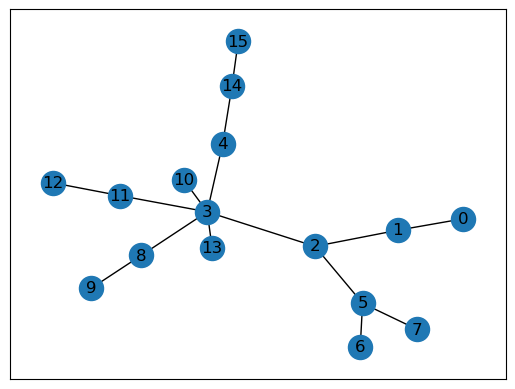

In [2]:
G = nx.random_lobster(n=20, p1=.5, p2 = 0.5, seed=1)
# Dibuja el grafo
nx.draw_networkx(G, with_labels=True)

# Page Rank

PageRank define la importancia de un nodo como una ponderación entre un valor de importancia inicial que tienen un nodo y la importancia que le entregan sus vecinos.

In [3]:
P = nx.pagerank(G, alpha=0.85)
P

{0: 0.03813551463060505,
 1: 0.06767078514595254,
 2: 0.0913463277612693,
 3: 0.17806885723117344,
 4: 0.06433416895398916,
 5: 0.09876540053985258,
 6: 0.037358961218123876,
 7: 0.037358961218123876,
 8: 0.06664683593860093,
 9: 0.037699474853735454,
 10: 0.034601851912540386,
 11: 0.06664683593860093,
 12: 0.037699474853735454,
 13: 0.034601851912540386,
 14: 0.06995738084970773,
 15: 0.03910731704144878}

## Histograma

Al igual que en el laboratorio anterior la medida de PageRank se puede entender como una distribución en los nodos y podemos ver su distribución empírica en un histograma.

(array([8., 0., 5., 1., 1., 0., 0., 0., 0., 1.]),
 array([0.03460185, 0.04894855, 0.06329525, 0.07764195, 0.09198865,
        0.10633535, 0.12068206, 0.13502876, 0.14937546, 0.16372216,
        0.17806886]),
 <BarContainer object of 10 artists>)

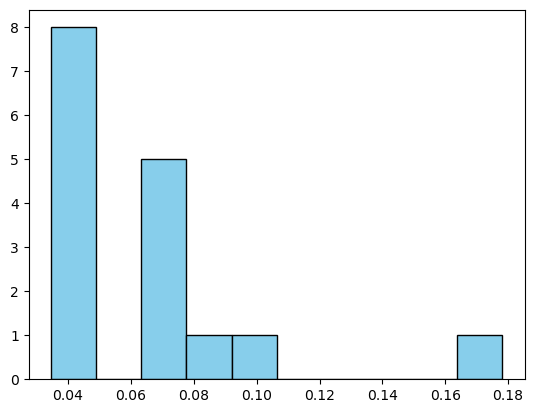

In [4]:
import matplotlib.pyplot as plt

plt.hist(P.values(), color='skyblue', edgecolor='black')

# Comparación de distintas medidas de centralidad

Las medidas de centralidad vistas en el laboratorio pasado y la medida PageRank nos proporcionan información acerca de la importancia de los nodos bajo distintas métricas, es por esto que si queremos buscar el nodo más importante es necesario comparar el comportamiento de estas métricas.
A continuación se ejemplifica una forma de visualizar estos resultados:

In [5]:
# Calcular medidas de centralidad
degree_centrality = nx.degree_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
pagerank = nx.pagerank(G)



Como cada medida tiene una escala distinta es necesario normalizarlas entre 0 y 1, para poder compararlas adecuadamente.

In [6]:
# Normalizar los valores (opcional, depende de tus necesidades)
degree_centrality = {node: value / max(degree_centrality.values()) for node, value in degree_centrality.items()}
closeness_centrality = {node: value / max(closeness_centrality.values()) for node, value in closeness_centrality.items()}
betweenness_centrality = {node: value / max(betweenness_centrality.values()) for node, value in betweenness_centrality.items()}
pagerank = {node: value / max(pagerank.values()) for node, value in pagerank.items()}


## Grafico de comparación
Luego de obtener las distintas medidas simplemente creamos una serie de grafos de barra de forma vertical para ver las diferencias en cada nodo.

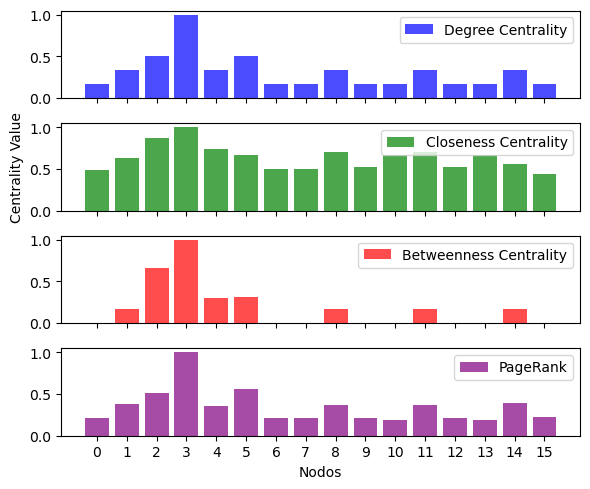

In [7]:

# Preparar datos para el gráfico de barras
nodes = list(G.nodes())
degree_values = [degree_centrality[node] for node in nodes]
closeness_values = [closeness_centrality[node] for node in nodes]
betweenness_values = [betweenness_centrality[node] for node in nodes]
pagerank_values = [pagerank[node] for node in nodes]

# Crear gráfico de barras
fig, axes = plt.subplots(nrows=4, sharex=True, figsize=(6, 5))

axes[0].bar(nodes, degree_values, color='b', alpha=0.7, label='Degree Centrality')
axes[1].bar(nodes, closeness_values, color='g', alpha=0.7, label='Closeness Centrality')
axes[2].bar(nodes, betweenness_values, color='r', alpha=0.7, label='Betweenness Centrality')
axes[3].bar(nodes, pagerank_values, color='purple', alpha=0.7, label='PageRank')

# Añadir etiquetas y leyenda
axes[-1].set_xticks(nodes)
axes[-1].set_xticklabels(nodes)
axes[-1].set_xlabel('Nodos')
axes[1].set_ylabel('Centrality Value')
axes[0].legend()
axes[1].legend()
axes[2].legend()
axes[3].legend()

plt.tight_layout()
plt.show()

Vemos que el nodo 3 en todas las medidas tiene una importancia mayor al resto, seguido por el nodo 2 y 5 que toman valores un poco mayor al resto en la mayoría de las medidas.

In [8]:
print("Número de Nodos: ", len(G.nodes))
print("Número de Aristas: ", len(G.edges))

Número de Nodos:  16
Número de Aristas:  15
